In [657]:
# Imports
import pandas as pd
import seaborn as sns


In [658]:
file_name = "irisdataset.csv"
df = pd.read_csv(file_name, sep='\s+')
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### Problem 1

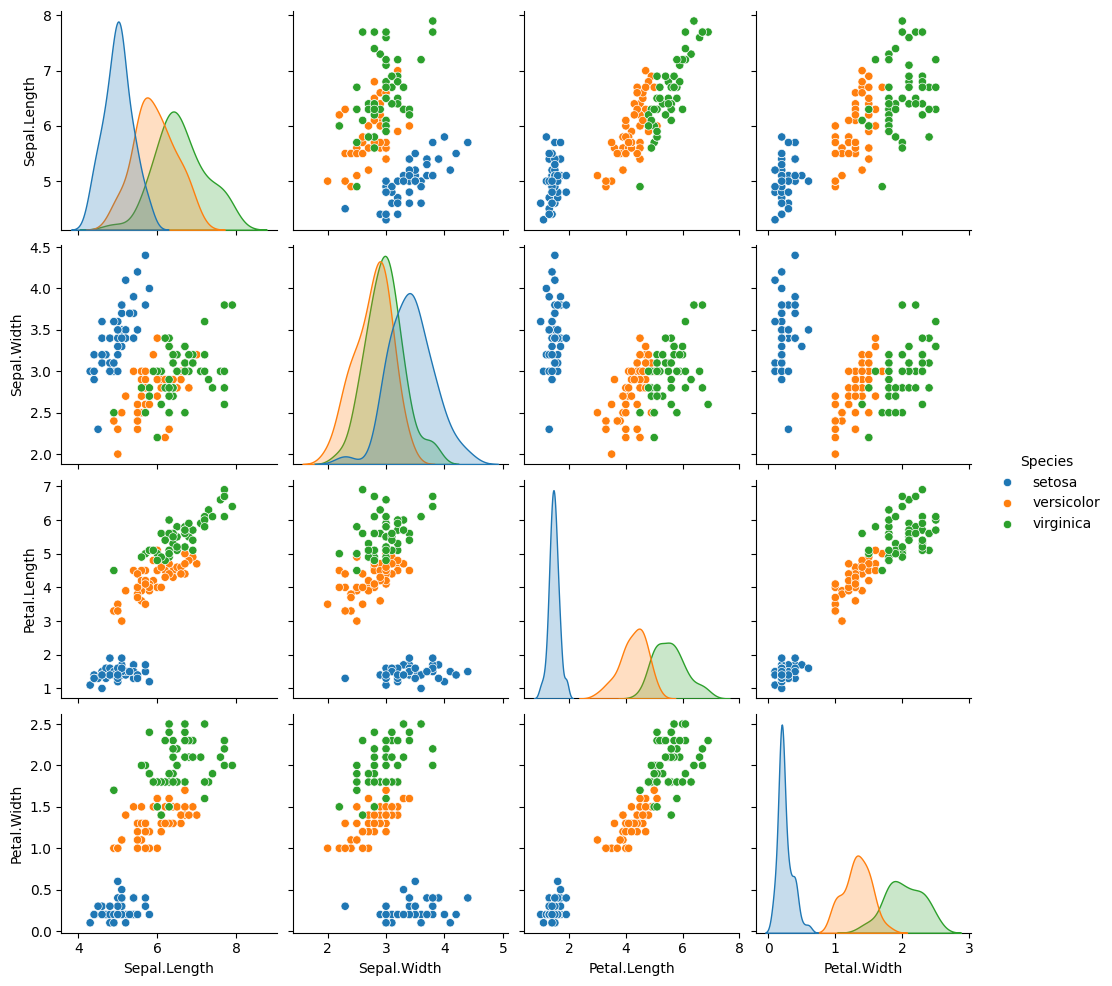

In [659]:
# Pair plots

sns.pairplot(df, hue="Species")

Which plots, if any,  show 3 linearly separable clusters (with a few errors)?  

    The pair plot reveals a much greater seperation of setosa (in blue) from the other two species.
    
    The following plots show 3 linearly separable clusters (with a few errors)
    1. Petal width against petal length.
    2. Petal width against sepal width.
    3. Petal width against sepal length


Which plots, if any, show at least one cluster linearly separable from the others (with a few errors)?  

    All plots show the setosa cluster as linearly seperable from the other clusters.

Would you reduce dimension by dropping 2 measurements?  If not, why not?  If so, which two measurements would you remove?

    Dimensionality of data is defined by the number of features. Dropping 2 measurements would reduce the number of features. 

    Ideally, the 2 measurements that are removed have the least impact on data loss and clustering loss. 
    Petal width against petal length seems to show the least amount of overlap of species within the pair plot. 

    For this reason, I would drop sepal length and sepal width, although I think arguements can be made for keeping any of the 3 measurements alongside petal width, which seems to be the strongest indicator of species type. 
    

### Problem 2

In [660]:
# Problem 2 imports
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Drop string column, species
df_scalars = df.drop(columns=['Species'])

# Begin by centering by mean

data = []
for column in df_scalars.columns: # iterate thru each column
    mean = df_scalars[column].mean()
    std = df_scalars[column].std()

    new_column = []
    for i in range(1,len(df_scalars[column]) + 1): # data is indexed at 1
        new_value = ((df_scalars.at[i, column] - mean) / std) # standardization
        new_column.append(new_value)
    
    data.append(new_column)

normal_df = pd.DataFrame(data=data).transpose() # Fix list dimension
normal_df.columns = df_scalars.columns 
        
normal_df



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


label the horizontal axis as "score1", the vertical axis as "score2 ", provide coloring for each point based on its label (5th column of the iris dataset), and a legend showing the coloring key.  Are the cluster more resolvable using the score axes than in any of the pairs plots?  If so, provide your reasoning.  If not, provide the pairs plot cell which has better resolution.

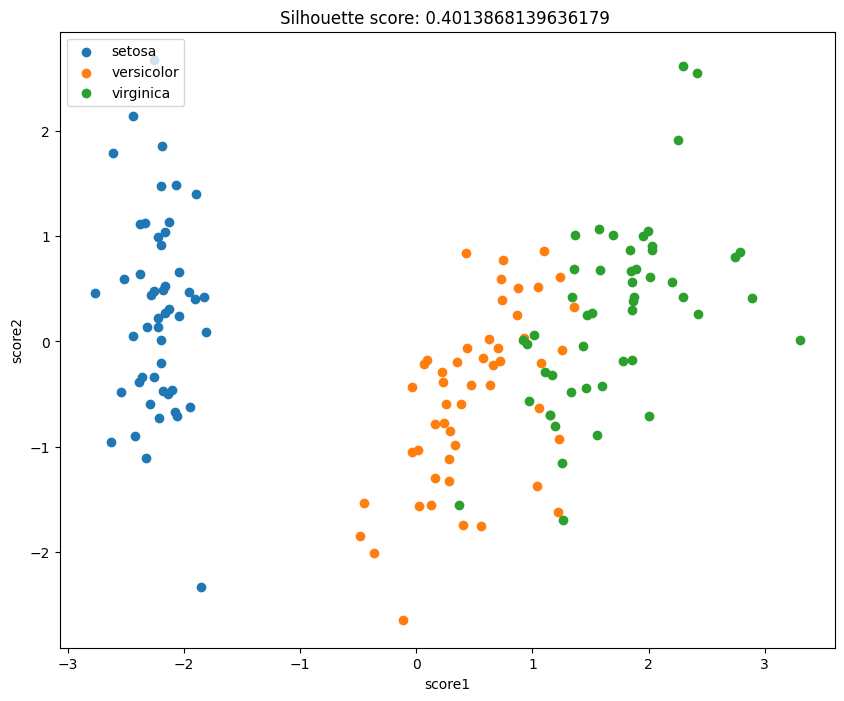

In [661]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(normal_df)

# Computing sil. score for problem 3
# Problem 3 imports
from sklearn.metrics import silhouette_score

X = pca_scores
labels = df['Species'].values
sil_score = silhouette_score(X, labels=labels)


# Define color map
colors = {"setosa": "#1f77b4", "versicolor": "#ff7f0e", "virginica": "#2ca02c"}

# Create scatter plot
plt.figure(figsize=(10, 8))
for species, color in colors.items():
    plt.scatter(pca_scores[df['Species'] == species, 0], 
                pca_scores[df['Species'] == species, 1], 
                color=color, 
                label=species)

plt.xlabel("score1")
plt.ylabel("score2")
plt.title(f"Silhouette score: {sil_score} ")
# Add legend
plt.legend(loc='upper left')
plt.show()


Clusters are not more resolvable from the PCA data set compaired to the plot of petal length against petal width. Petal length vs petal width displays an obvious line of linear clustering in which there are only half a dozen or so clusters.

In the PCA plot above, there is a distinc overlap between veriscolor and verginica labels.

### Problem 3

In [662]:
# Problem 3 imports
from sklearn.metrics import silhouette_score

X = pca_scores
labels = df['Species'].values
sil_score = silhouette_score(X, labels=labels)

print(sil_score)

0.4013868139636179


4.)  Using only the silhouette coefficient, can you improve the clustering using kernel PCA using the RBF kernel? 

 To explore this, please apply KPCA to your normalized data from 2, choosing the rbf kernel option.  This kernel has a single parameter, sigma, also referred to as the inverse kernel width.  Consider the values of sigma from 0.002 to 2 in increments of 0.1.  Apply KPCA, requesting only 2 principal components,  for each value of sigma, and compute the silhouette coefficient for each as well.  Produce a plot of the silhouette coefficient versus sigma as follows: label the horizontal axis "sigma" with range 0 to 2, the vertical axis "avgSilCoef" with range 0.35 to 0.5, and provide the data as red points.  Please title the graph: "Iris clustering w/KPCA, rbf kernel".    

### Problem 4

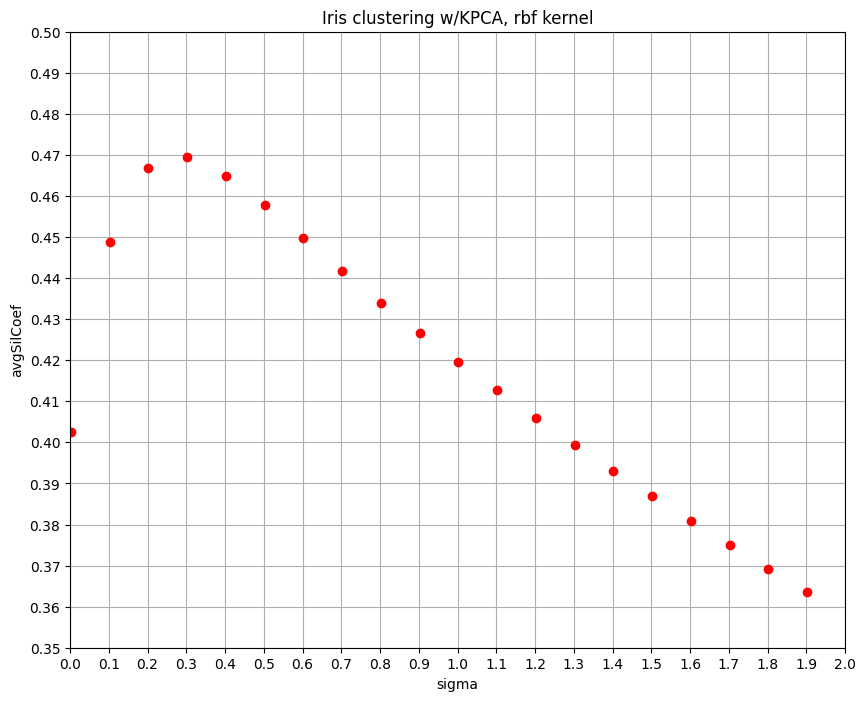

In [663]:
# Problem 4 imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.metrics import silhouette_score

# Define variables
X = normal_df
labels = df['Species'].values

# Define paramater ranges:
sigma = np.arange(0.002, 2.0, 0.1)

# In sklearn, gamma is the sigma parameter
sil_scores = []

for each in sigma:
    transformer = KernelPCA(n_components=2, kernel='rbf', gamma = each) 
    X_transformed = transformer.fit_transform(X)
    sil_score = silhouette_score(X_transformed, labels)
    sil_scores.append(sil_score)


# Create  plot
plt.figure(figsize=(10, 8))

plt.plot(sigma, sil_scores, 'ro')  

plt.xlabel("sigma")
plt.xticks(np.arange(0, 2.1, 0.1))
plt.ylabel("avgSilCoef")
plt.yticks(np.arange(0.35, 0.51, 0.01)) 

plt.xlim(0, 2)  # Set x-axis limit
plt.ylim(0.35, 0.5) 
plt.title(f"Iris clustering w/KPCA, rbf kernel")
plt.grid()

plt.show()

Provide answers to the following questions.  Can KPCA produce better clustering (in the sense above) than PCA?  If not, provide your reasoning.  If so, find the range of sigma which produces better clustering.

Yes. The silhouette score in problem 3 was 0.4. 
We can see from the graph abpve, that when sigma = 0.3, avgSilCoef is equal to 0.47.
Because a greater silhouette score indicates better clustering, and 0.47 > 0.4, we can deduce that KPCA produced betetr clustering. 

### Problem 5

The greatest silhouette score was found at a sigma 0.3 

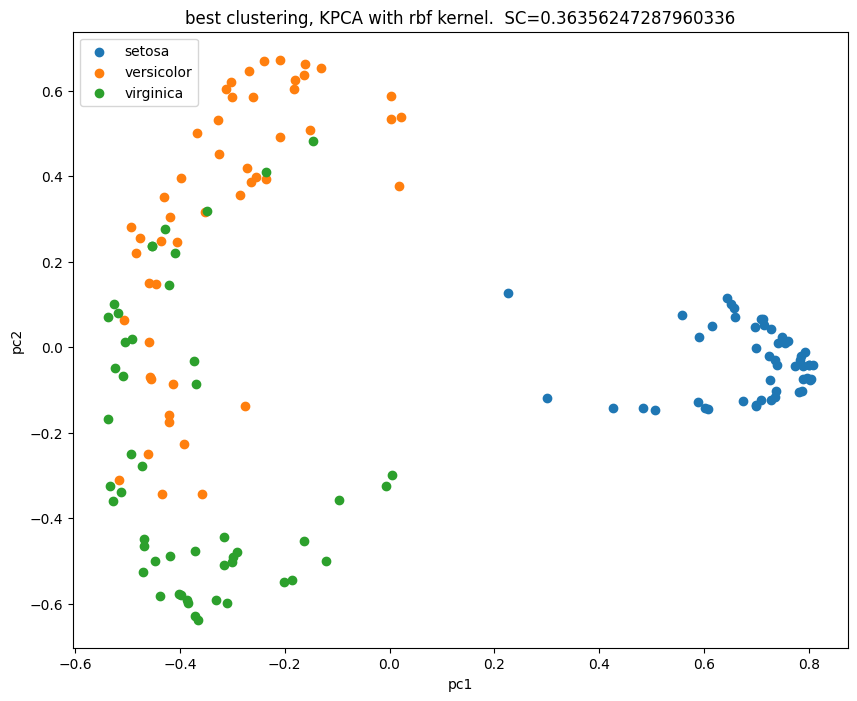

In [664]:
# Define variables
X = normal_df
labels = df['Species'].values

pca = PCA(n_components=2)
pca_scores = pca.fit_transform(normal_df)

# Define sigma based on problem 4
sigma = 0.3

# Do KPCA and get best sil score for plot title
transformer = KernelPCA(n_components=2, kernel='rbf', gamma = sigma) 
KPCA_scores = transformer.fit_transform(X)
sil_score = silhouette_score(X_transformed, labels)

# Plot KPCA from best sigma value
# ------------------------------

# Define color map
colors = {"setosa": "#1f77b4", "versicolor": "#ff7f0e", "virginica": "#2ca02c"}

# Create scatter plot
plt.figure(figsize=(10, 8))
for species, color in colors.items():
    plt.scatter(KPCA_scores[df['Species'] == species, 0], 
                KPCA_scores[df['Species'] == species, 1], 
                color=color, 
                label=species)

plt.xlabel('pc1')
plt.ylabel("pc2")
plt.title(f"best clustering, KPCA with rbf kernel.  SC={sil_score}")

# Add legend
plt.legend(loc='upper left')
plt.show()

Provide answers to the following questions: do the rbf clusters resemble the PCA clusters?  If not, why not?  If so, why?

    The rbf clusters only slightly resemble the PCA clusters in that setosa is distinctly clustered from veriscolor and virginica, which stand on their own and are intertwined.

    Other than that, the rbf clusters between virginica and versicolor seem significantly more overlapped. Overall, both inter-cluster distance seems smaller and intra-cluster distance seems greater, both of which are unfavorable conditions. 

### Problem 6

In [665]:
# Imports
import seaborn as sns

# Define variables
X = normal_df
labels = df['Species'].values

# Define paramater ranges for scale, offset, and degree:
scales = np.arange(0.1, 3.0, 0.6)
offsets = np.arange(0.2, 5.0, 0.2)
degrees = np.arange(1.0, 5.0, 1.0)

sil_scores = []

# Prep nested array for df generation
series = [['scale', 'degree', 'sil_score']]

# Apply each combo of parameters to KPCA
for scale in scales:
    for degree in degrees:
        for offset in offsets:
            transformer = KernelPCA(n_components=2, kernel='poly', gamma = scale, degree=degree, coef0=offset) 
            X_transformed = transformer.fit_transform(X)
            sil_score = silhouette_score(X_transformed, labels)
            series.append([scale,degree,sil_score])

df_poly = pd.DataFrame(data=series[1:],columns=series[0])

# sanity check dataframe
df_poly.head(5)

,scale,degree,sil_score
0,0.1,1.0,0.401387
1,0.1,1.0,0.401387
2,0.1,1.0,0.401387
3,0.1,1.0,0.401387
4,0.1,1.0,0.401387


<Figure size 1000x800 with 0 Axes>

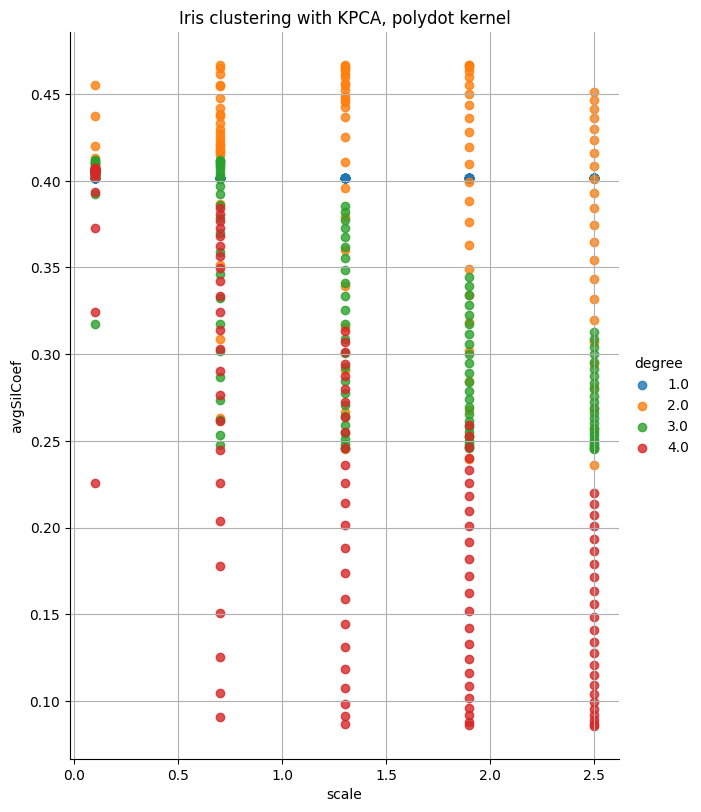

In [666]:
# Plotting

# Create scatter plot
plt.figure(figsize=(10, 8))

# Use seaborn lmplot for plotting each degree color
sns.lmplot(x='scale', 
           y='sil_score', 
           height=8,
           aspect=.8,
           data=df_poly, 
           fit_reg=False, 
           hue='degree', 
           legend=True)

plt.xlabel("scale")
plt.ylabel("avgSilCoef")
plt.title("Iris clustering with KPCA, polydot kernel")
plt.grid()

plt.show()

In [667]:
best_sil = df_poly['sil_score'].max()
row = df_poly.loc[df_poly['sil_score'] == best_sil]
row

,scale,degree,sil_score
231,1.3,2.0,0.466755


Can KPCA with polynomial kernel produce better clustering of the iris dataset than PCA? If so, provide the degree which yields the best clustering.  If not, provide your reasoning with reference to the graph.

    Based solely on best silhouette scores, polynomial kerneling did NOT produce better ckustering of the iris dataset compared to PCA.

    The best silhouette score for PCA was found to be 0.47.
    The highest silhouette score in the chart above was 0.4667, found at a scale of 1.3 and a degree of 2.0. 

    Although the silhouette scores are close, the PCA sil score was higher, which indicates better clustering.
    More clustering analysis should be done to actually identify which dimensionality reduction method results in superior clustering.



### Problem 7

In [668]:
# Repeat problem 6, but reporting the varying offsets instead of scales

# Prep nested array for df generation
series = [['offset', 'degree', 'sil_score']]

# Apply each combo of parameters to KPCA
for offset in offsets:
    for degree in degrees:
        for scale in scales:
            transformer = KernelPCA(n_components=2, kernel='poly', gamma = scale, degree=degree, coef0=offset) 
            X_transformed = transformer.fit_transform(X)
            sil_score = silhouette_score(X_transformed, labels)
            series.append([offset,degree,sil_score])

df_poly_offset = pd.DataFrame(data=series[1:],columns=series[0])

# sanity check dataframe
df_poly_offset.head(3)

,offset,degree,sil_score
0,0.2,1.0,0.401387
1,0.2,1.0,0.401387
2,0.2,1.0,0.401387


<Figure size 1000x1600 with 0 Axes>

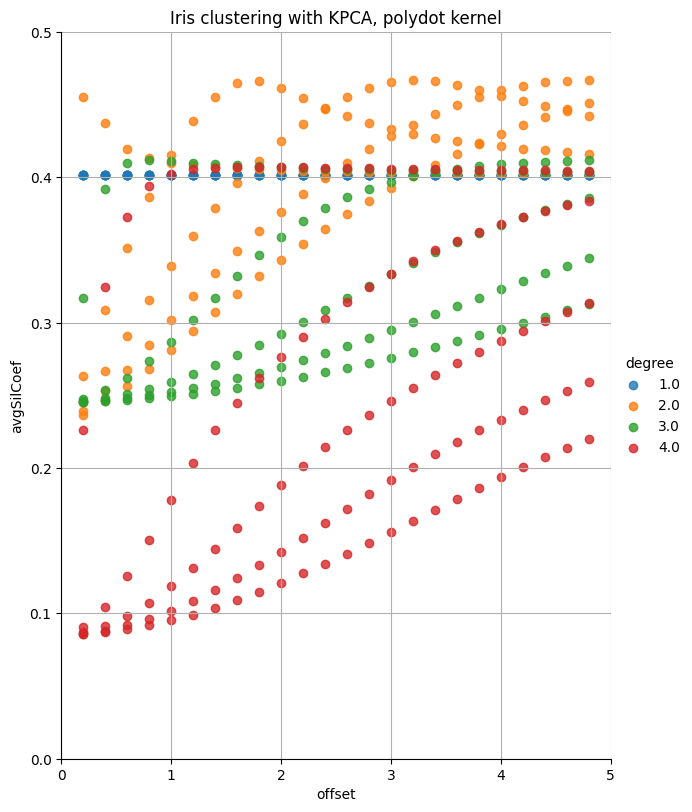

In [669]:
# Plotting Prob. 7

# Create scatter plot
plt.figure(figsize=(10, 16))

# Use seaborn lmplot for plotting each degree color
sns.lmplot(x='offset', 
           y='sil_score', 
           height=8,
           aspect=.8,
           data=df_poly_offset, 
           fit_reg=False, 
           hue='degree', 
           legend=True)

plt.xlabel("offset")
plt.ylabel("avgSilCoef")
# Set axis limits
plt.xlim(0, 5)  
plt.ylim(0, 0.5) 

plt.title("Iris clustering with KPCA, polydot kernel")

plt.grid()

plt.show()

In [670]:
print(len(scales))
print(len(offsets))
print(len(degrees))

5
24
4


<Figure size 1000x1600 with 0 Axes>

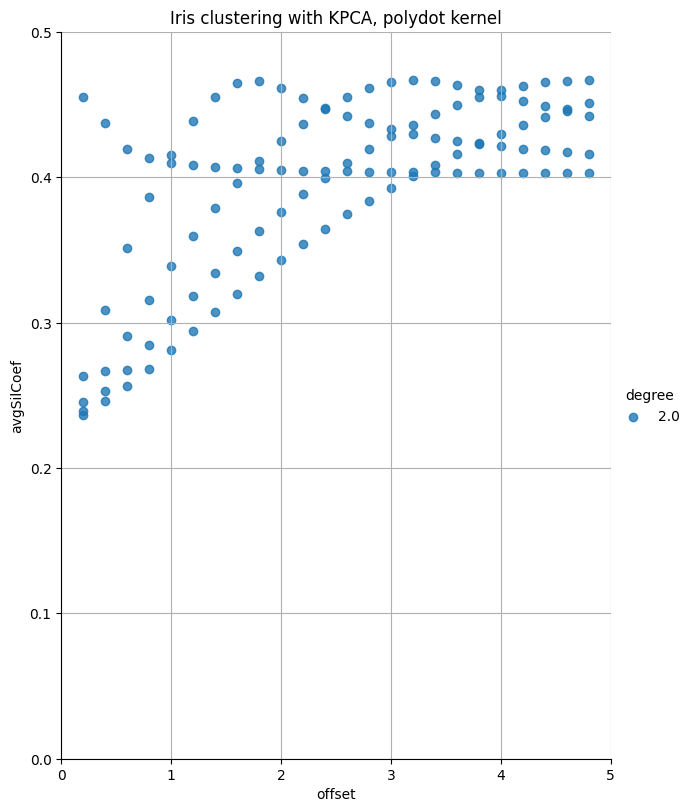

In [671]:

# Isolating just degree 2
plt.figure(figsize=(10, 16))

df_poly_offset_degree_2 = df_poly_offset.loc[df_poly_offset['degree'] == 2]

# Use seaborn lmplot for plotting each degree color
sns.lmplot(x='offset', 
           y='sil_score', 
           height=8,
           aspect=.8,
           data=df_poly_offset_degree_2, 
           fit_reg=False, 
           hue='degree', 
           legend=True)

plt.xlabel("offset")
plt.ylabel("avgSilCoef")
# Set axis limits
plt.xlim(0, 5)  
plt.ylim(0, 0.5) 

plt.title("Iris clustering with KPCA, polydot kernel")

plt.grid()

plt.show()

Provide answers to the following questions: 

Why are the values of silhouette coefficient close to those of PCA for degree=1? 

    A degree of 1 indicates that this was the highest power used in the polynomial kernel. 
    KPCA using a polydot kernel reduces the dimensionality of data by mapping high dimensional features using polynomial functions. PCA also reduces dimensionality, but by using linear functions. When the degree is 1, it would then follow that KPCA using a degree of 1 is similar to a linear function, as both are reducing dimensionality using linear functions, which would consequently result in simialr sillouette coefficients between teh two different functions, on the same input data set.
    
Why are the markers for degree=1 have approximately the same silhouette coefficient?  

    When the function in linear, the transformations applied to the data by KPCA will remain linear, regardless of the offset of the data. As expalined above, when the degree=1, the polynomial function by which the data is transformed is a linear function.

For each color, the markers appear to form five curves. Why is that? What is the shape of these curves for degree=2?

    There are 5 curves that form because of how the input data was defined. Each curve is directly a result of theere being 5 input offsets. There are 5 input offsets, so there are 5 curves (for each of the 4degrees), because there are 5 points at each x value on the plot. In the case of the degree=1, only one curve can be seen because they  are overlapping. At each offset value, there are 5

    As far as shapes of the curves, there are some distinctly different behaviors.
    3 of the curves appear to grow logarithmically, dying out in their growth at silhouette scores between about 0.4 and 0.46. One of the curves appears to initially grow exponentially, before peaking at around an offset of 1.8 and silhouette score of 0.46, before decaying as the offset grows. And the final curve shows a logarithmic decay, with its greatest silhouette score occuring at the lowest offset value, and the rate of decay shrinking as the offset value grows.



### Problem 8

In [672]:
# Retrieve the scale and degree that produced the best sil_score
max_sil = df_poly['sil_score'].max()
best_scale = df_poly.loc[df_poly['sil_score'] == max_sil]['scale'].item()
best_degree = df_poly.loc[df_poly['sil_score'] == max_sil]['degree'].item()

# Redefine paramater range for offset used in Problem 6 (for clarity)
offsets = np.arange(0.2, 5.0, 0.2)

# Reiterate through all the offsets to find the best offset

# Prep nested array for df generation
series = [['offset' ,'sil_score']]

# Apply each offset to KPCA, with best_scale and best_degree
for offset in offsets:
    transformer = KernelPCA(n_components=2, kernel='poly', gamma = best_scale, degree=best_degree, coef0=offset) 
    X_transformed = transformer.fit_transform(X)
    sil_score = silhouette_score(X_transformed, labels)
    series.append([offset, sil_score])

df_poly_best_offset = pd.DataFrame(data=series[1:],columns=series[0])


# Get best offset value that retrieves max_sil from earlier
best_offset = df_poly_best_offset.loc[df_poly_best_offset['sil_score'] == max_sil]['offset'].item()

# Use optimal values to retrieve KPCA poly scores
transformer = KernelPCA(n_components=2, kernel='poly', gamma = best_scale, degree=best_degree, coef0=best_offset) 
best_poly_KPCA_scores = transformer.fit_transform(X)



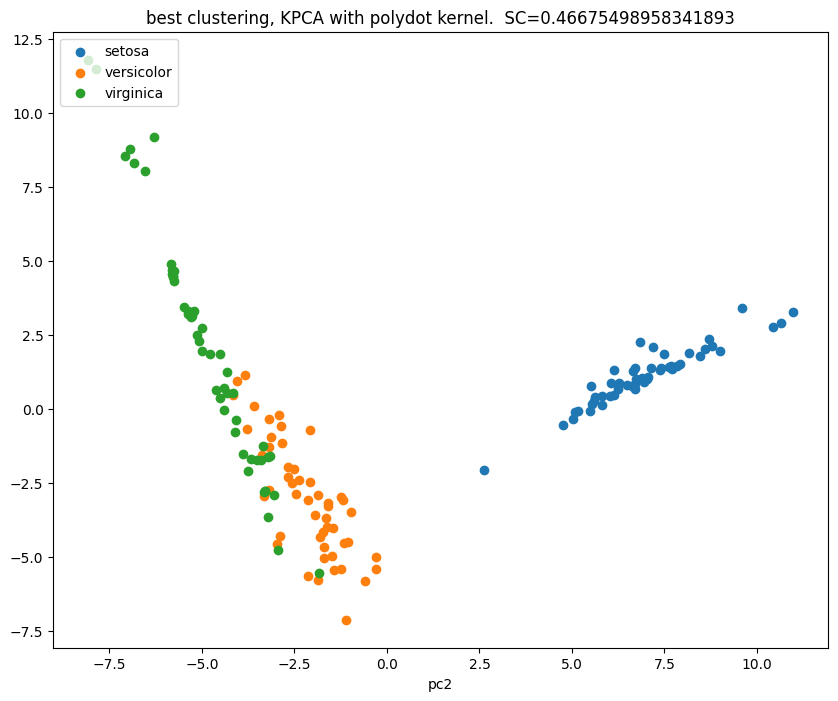

In [673]:
# Plotting problem 8: poly KPCA optimal scores

# Flatten scores for plotting
# best_poly_KPCA_scores = best_poly_KPCA_scores.transpose()

# Define color map
colors = {"setosa": "#1f77b4", "versicolor": "#ff7f0e", "virginica": "#2ca02c"}

# Create scatter plot
plt.figure(figsize=(10, 8))

for species, color in colors.items():
    plt.scatter(best_poly_KPCA_scores[df['Species'] == species, 0], 
                best_poly_KPCA_scores[df['Species'] == species, 1], 
                color=color, 
                label=species)
    
plt.xlabel('pc1')
plt.xlabel('pc2')
plt.title(f"best clustering, KPCA with polydot kernel.  SC={max_sil}")
plt.legend(loc='upper left')
plt.show()

 Provide answers to the following questions: do the polydot clusters resemble the PCA clusters?  If not, why not?  If so, why?
    
    The polydot clusters resemble the PCA clusters in a number of ways: The setosa cluster is distinct from the other 2 species, has high within clustering values, and low between clustering values.

    As well, like the PCA clusters, there is a number of overlapping values within the virginica and veriscolor clusters. 
    Unlike the PCA clusters, the between clustering values of each cluster is much greater. I believe this is even more exaggerated in the case of the polydot clusters, to the point that most of the virginica and veriscolor values seem to be clustered together, which is likely what contributed to the largest silhouette score value found in problem 6. It even seems that a small cluster of virginica values was resolved, increasing the sil. coefficient.  



### Problem 9

In [674]:
# Imports
import seaborn as sns

# Define variables
X = normal_df
labels = df['Species'].values

# Define paramater ranges for scale, offset, and degree:
scales = np.arange(0.05, 6.0, 0.5)
offsets = np.arange(1.0, 10.0, 2.0) # we can not increment from 1 to 10 in increments of 2

# Prep nested array for df generation
series = [['scale', 'offset', 'sil_score']]

# Apply each combo of parameters to KPCA 
# Sigmoid is the tanh equivelant in sklearn
for scale in scales:
    for offset in offsets:
        transformer = KernelPCA(n_components=2, kernel='sigmoid', gamma = scale, coef0=offset) 
        X_transformed = transformer.fit_transform(X)
        sil_score = silhouette_score(X_transformed, labels)
        series.append([scale,offset,sil_score])

df_tanh = pd.DataFrame(data=series[1:],columns=series[0])

# sanity check dataframe
df_tanh.head(4)

,scale,offset,sil_score
0,0.05,1.0,0.396230
1,0.05,3.0,0.392390
2,0.05,5.0,0.392300
3,0.05,7.0,0.392299


In [675]:
df_tanh['offset'].max()

9.0

<Figure size 1000x1600 with 0 Axes>

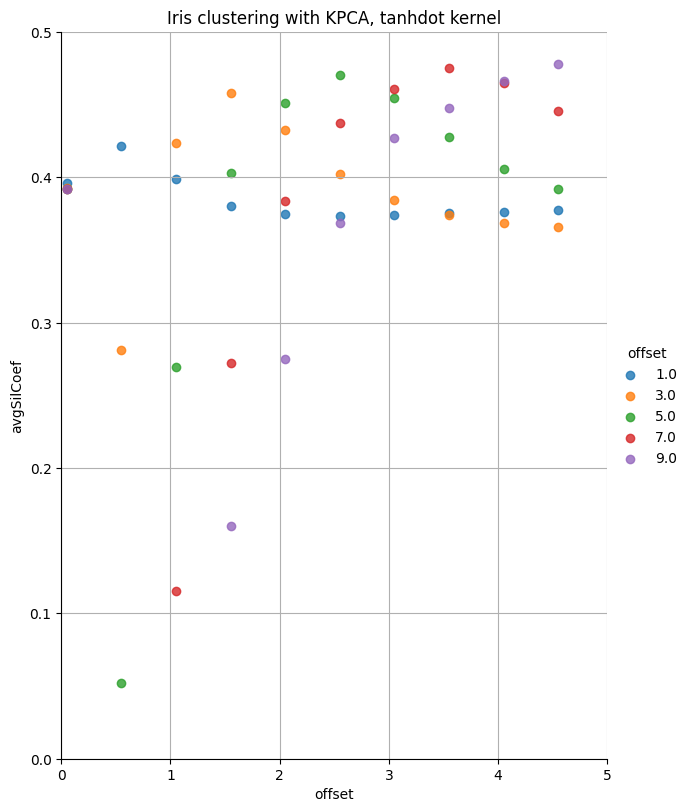

In [676]:
# Plotting Prob. 8

# Create scatter plot
plt.figure(figsize=(10, 16))

# Use seaborn lmplot for plotting each degree color
sns.lmplot(x='scale', 
           y='sil_score', 
           height=8,
           aspect=.8,
           data=df_tanh, 
           fit_reg=False, 
           hue='offset', 
           legend=True)

plt.xlabel("offset")
plt.ylabel("avgSilCoef")
# Set axis limits
plt.xlim(0, 5)  
plt.ylim(0, 0.5) 

plt.title("Iris clustering with KPCA, tanhdot kernel")

plt.grid()

plt.show()

In [677]:
print(df_tanh.loc[df_tanh['sil_score'] == df_tanh['sil_score'].max()])

    scale  offset  sil_score
49   4.55     9.0   0.478084


can KPCA with tanh kernel produce better clustering of the iris dataset than PCA? If so, provide the parameter ranges which yield better clustering

    When determining the PCA method that yields better clustering solely based off silhouette score, the greater score indicates better clustering.

    When Scale = 4.55 and offset - 9.0, the silhouette score for tanh kernel was 0.47807.

    The PCA shilhouette score found in problem 3 was 0.40. Because 0.47 > 0.40, it can be deduced that KPCA with tanh kernel produced better clustering than PCA.


### Problem 10


In [678]:
max_offset = df_tanh.loc[df_tanh['sil_score'] == df_tanh['sil_score'].max(), 'offset']
max_offset.item()

9.0

In [679]:
# Define variables
X = normal_df
labels = df['Species'].values

# Retrieve optimal scale and offset for max silhouette score
max_scale = df_tanh.loc[df_tanh['sil_score'] == df_tanh['sil_score'].max(), 'scale'].item()
max_offset = df_tanh.loc[df_tanh['sil_score'] == df_tanh['sil_score'].max(), 'offset'].item()

# Generate tanh KPCA scores
transformer = KernelPCA(n_components=2, kernel='sigmoid', gamma = max_scale, coef0=max_offset) 
tanh_KPCA_scores = transformer.fit_transform(X)

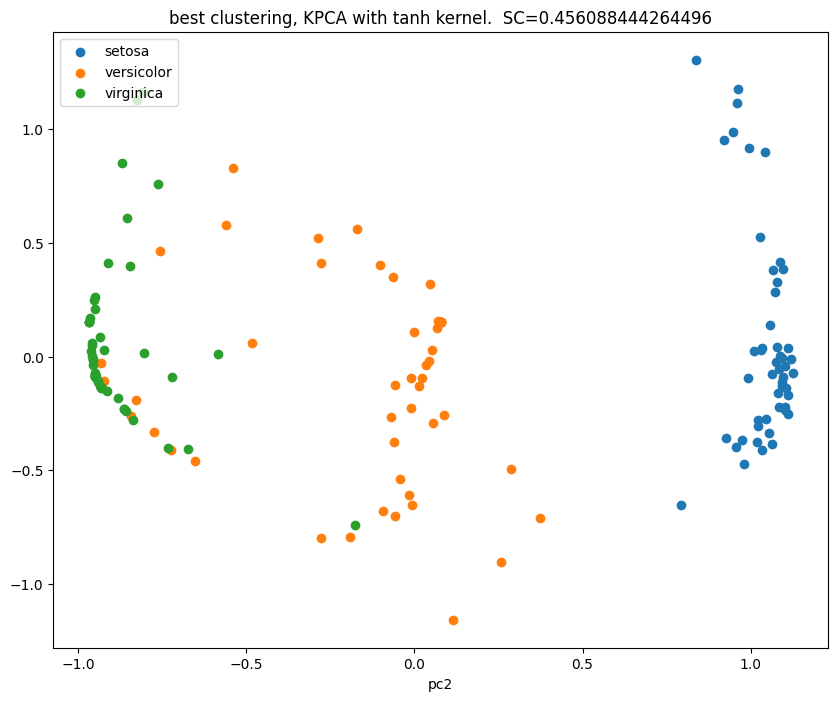

In [680]:
# tanh_KPCA_scores = tanh_KPCA_scores.transpose()
# plt.scatter(tanh_KPCA_scores[0],tanh_KPCA_scores[1])

# Define color map
colors = {"setosa": "#1f77b4", "versicolor": "#ff7f0e", "virginica": "#2ca02c"}

# Create scatter plot
plt.figure(figsize=(10, 8))

for species, color in colors.items():
    plt.scatter(tanh_KPCA_scores[df['Species'] == species, 0], 
                tanh_KPCA_scores[df['Species'] == species, 1], 
                color=color, 
                label=species)
    
plt.xlabel('pc1')
plt.xlabel('pc2')
plt.title(f"best clustering, KPCA with tanh kernel.  SC={sil_score}")
plt.legend(loc='upper left')
plt.show()



Do the tanh clusters resemble the PCA clusters?  If not, why not?  If so, why?

    The tanh clusters resemble the PCA clusters in that the setosa cluster remains far from the other two clusters.

    As far as differences: smaller within-clustering distances can be see for both the setosa cluster and virginica cluster for the tanh KPCA, compared to the PCA plot. 

    As well,  when ignoring the outliers, the versicolor and virginica clusters seem to be more distinct from one another for the tanh KPCA scores compared to the problem 2 PCA scores.

    For this reason, I would argue that ultimately the tanh KPCA scores do not resemble the PCA scores, the tanh KPCA scores produced better clustering overall by resolving with greater between clustering value